In [1]:
#from dynamic import DynamicModel
from beam import GetCompletions, InitBeam,GetSavedKeystrokes
from model import MetaModel
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time
#from AMSGrad import AMSGrad

In [2]:
m = MetaModel('../referit_experiment_img_4_3')
m.MakeSessionAndRestore(2)

(?, 32, 32, 512)
INFO:tensorflow:Restoring parameters from ../referit_experiment_img_4_3/model.bin


In [19]:
# m = DynamicModel(
#     '/Users/Sam/Desktop/School/Deep Learning/FinalProject/query_completion/referit_experiment_img', 
#     learning_rate=1.0,
#     optimizer=tf.train.GradientDescentOptimizer)

# m.session.run(m.reset_user_embed)

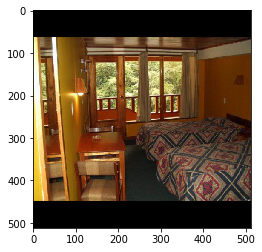

In [3]:
example_image = np.load('../data/referit/img_train/1334.npy')
plt.imshow(example_image)

In [4]:
vgg_feat = m.ComputeVGG(example_image)

Query: "b"

beam 1.918: <S>bed</S>
beam 3.754: <S>bed on right</S>
beam 4.580: <S>bed on left</S>
beam 5.091: <S>bottom left corner</S>
beam 5.298: <S>brown wall</S>


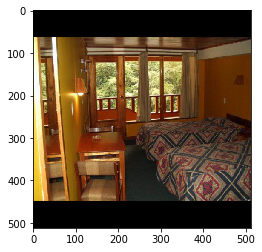

In [5]:
prefix = 'b'
b = GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100)
plt.imshow(example_image)
print('Query: "{}"\n'.format(prefix))
for item in list(b)[:-6:-1]:
    print item

In [6]:
for prefix in ['t','th','the','the ','the b','the bed']:
    print(list(GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100))[-1])

beam 2.743: <S>table</S>
beam 3.432: <S>the window</S>
beam 3.322: <S>the window</S>
beam 3.321: <S>the window</S>
beam 1.696: <S>the bed</S>
beam 1.324: <S>the bed</S>


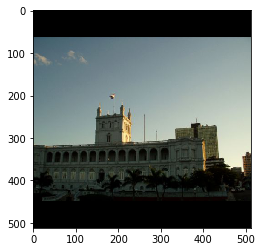

In [49]:
example_image = np.load('../data/referit/img_val/51.npy')
#example_image = np.zeros((512,512,3))
plt.imshow(example_image)
vgg_feat = m.ComputeVGG(example_image)

Query: "b"

beam 1.628: <S>building</S>
beam 3.165: <S>building on right</S>
beam 3.606: <S>building on left</S>
beam 4.020: <S>building in middle</S>
beam 4.042: <S>buildings</S>


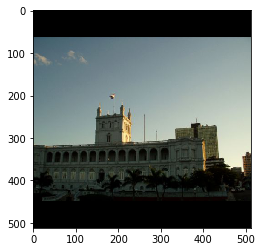

In [50]:
prefix = 'b'
b = GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100)
plt.imshow(example_image)
print('Query: "{}"\n'.format(prefix))
for item in list(b)[:-6:-1]:
    print item

In [65]:
for prefix in ['t','th','the','the s','the sky ','the sky a']:
    print('Query: {0:10}  Completion: {1}'.format(
        prefix,
        ''.join(list(GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100))[-1].words[1:-1])))

Query: t           Completion: the building
Query: th          Completion: the building
Query: the         Completion: the building
Query: the s       Completion: the sky
Query: the sky     Completion: the sky on right
Query: the sky a   Completion: the sky above building


Query: "a"

beam 0.768: <S>anywhere</S>
beam 4.624: <S>anything</S>
beam 4.858: <S>anywhere in front</S>
beam 5.116: <S>anywhere,</S>
beam 5.327: <S>anywhere on wall</S>


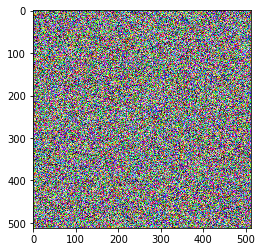

In [14]:
example_image = np.random.random((512,512,3))
#example_image = np.zeros((512,512,3))
vgg_feat = m.ComputeVGG(example_image)
prefix = 'a'
b = GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100)
plt.imshow(example_image)
print('Query: "{}"\n'.format(prefix))
for item in list(b)[:-6:-1]:
    print item